In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
#from torchvision.models import resnet50, resnet18, ResNet50_Weights
import torch.nn.functional as F

import tqdm.notebook as tqdm
from functools import partial
import time

#from google.colab import files

import resnet
import resnet_m

In [2]:
transform_train = transforms.Compose(
    [transforms.RandomCrop(32, padding=4, fill=128),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(30),
     transforms.ToTensor(),
     transforms.Normalize(
         mean=(0.4914, 0.4822, 0.4465),
         std=(0.2023, 0.1994, 0.2010))]
)

transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(
         mean=(0.4914, 0.4822, 0.4465),
         std=(0.2023, 0.1994, 0.2010))]
)

In [3]:
batch_size = 32

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size,
    shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size,
    shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


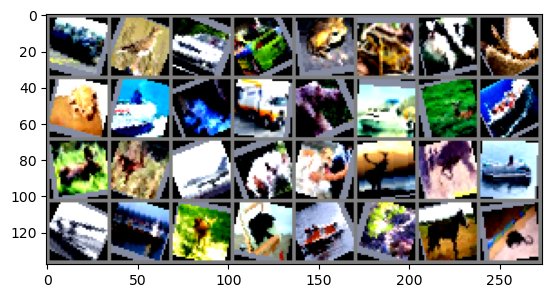

truck bird  car   car   frog  frog  dog   cat   frog  ship  dog   truck dog   ship  deer  ship  deer  deer  plane dog   dog   deer  deer  ship  plane ship  deer  cat   ship  deer  horse cat  


In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda', 0)
    
print(type(device), device)

<class 'torch.device'> cuda:0


In [6]:
model18 = resnet.resnet18(n_classes=10, width_decrement=2)
model18.load_state_dict(torch.load('model18_weights_best.pt'))
model18.eval()
model18.to(device)

ResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (relu): ReLU(inplace=True)
      (blocks): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (relu): ReLU(inplace=True)
      (blocks): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

In [7]:
model14 = resnet_m.resnet14(n_classes=10, width_decrement=2)
model14.to(device)

ResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (relu): ReLU(inplace=True)
      (blocks): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (relu): ReLU(inplace=True)
      (blocks): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

In [8]:
model10 = resnet_m.resnet10(n_classes=10, width_decrement=2)
model10.to(device)

ResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (relu): ReLU(inplace=True)
      (blocks): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (relu): ReLU(inplace=True)
      (blocks): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

In [9]:
model6 = resnet_m.resnet6(n_classes=10, width_decrement=2)
model6.to(device)

ResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (relu): ReLU(inplace=True)
      (blocks): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (relu): ReLU(inplace=True)
      (blocks): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

In [10]:
def KDLoss(x, labels, temperature=3.0):
    log_softmax_outputs = F.log_softmax(x/temperature, dim=1)
    softmax_targets = F.softmax(labels/temperature, dim=1)
    return -(log_softmax_outputs * softmax_targets).sum(dim=1).mean()

In [11]:
def training_loop(n_epochs, teachers:list, student, loss_fn, optimizer, dl_train, dl_test, device, ce_coef=(0.3,), densely_guided=False):
    train_losses, test_losses, train_accuracies, test_accuracies = [], [], [], []
    last_loss = 100
    best_loss = 100
    patience = 3
    patience_best = 6
    trigger_times = 0
    trigger_best = 0
    best_acc = 70
    pbar = tqdm.tqdm(range(n_epochs), total=n_epochs, leave=False)
    if len(ce_coef) < len(teachers):
        ce_coef = (ce_coef[0],) * len(teachers)
        
    for epoch in pbar:
        # Переводим сеть в режим обучения
        student.train(True)

        # Итерация обучения сети
        for images, labels in tqdm.tqdm(dl_train, total=len(dl_train), leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = student(images)
            if densely_guided:
                loss = 0
                for i, t in enumerate(teachers):
                    loss += (1 - ce_coef[i]) * loss_fn(outputs, labels)
                    teacher_output = t(images)
                    loss += ce_coef[i] * KDLoss(outputs, teacher_output)
            else:
                loss = (1 - ce_coef[-1]) * loss_fn(outputs, labels)
                teacher_output = teachers[-1](images)
                loss += ce_coef[-1] * KDLoss(outputs, teacher_output)
            #teacher_output = teacher(images.to(device))    
            #loss += ce_coef * KDLoss(outputs, teacher_output)
            loss.backward()
            optimizer.step()
        
        # Оцениваем качество модели каждые 3 итерации
        if epoch % 3 == 0 or epoch == n_epochs - 1:
            student.eval()

            with torch.no_grad():
                # Вычисление качества и функции потерь на обучающей выборке
                train_l = 0.
                train_ac = 0.
                total_train=len(dl_train)
                for images, labels in iter(dl_train):
                    images, labels = images.to(device), labels.to(device)
                    train_output = student(images)
                    if densely_guided:
                        for i, t in enumerate(teachers):
                            train_l += (1 - ce_coef[i]) * loss_fn(train_output, labels)
                            teacher_output = t(images)
                            train_l += ce_coef[i] * KDLoss(train_output, teacher_output)
                    else:
                        train_l += (1 - ce_coef[-1]) * loss_fn(train_output, labels)
                        teacher_output = teachers[-1](images)
                        train_l += ce_coef[-1] * KDLoss(train_output, teacher_output)
                    train_pred = train_output.argmax(axis = 1)
                    train_ac += (train_pred == labels).float().sum() / images.shape[0] * 100.
                train_accuracies.append(train_ac/total_train)
                train_losses.append(train_l/total_train)
                # Вычисление качества и функции потерь на тестовой выборке
                test_l = 0.
                test_ac = 0.
                total_test = len(dl_test)
                for images, labels in iter(dl_test):
                    images, labels = images.to(device), labels.to(device)
                    test_output = student(images)
                    if densely_guided:
                        for i, t in enumerate(teachers):
                            test_l += (1 - ce_coef[i]) * loss_fn(test_output, labels)
                            teacher_output = t(images)
                            test_l += ce_coef[i] * KDLoss(test_output, teacher_output)
                    else:
                        test_l += (1 - ce_coef[-1]) * loss_fn(test_output, labels)
                        teacher_output = teachers[-1](images)
                        test_l += ce_coef[-1] * KDLoss(test_output, teacher_output)
                    test_pred = test_output.argmax(axis = 1)
                    test_ac += (test_pred == labels).float().sum() / images.shape[0] * 100.
                test_accuracies.append(test_ac/total_test)
                test_losses.append(test_l/total_test)
                
            #early stopping
            if test_losses[-1] > last_loss:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping at epoch {epoch}')
                    break
            else:
                trigger_times = 0
            last_loss = test_losses[-1]  
            

            #сохранение лучшей модели
            #if test_accuracies[-1] > best_acc+3:
            #    state_dict = model50.state_dict()
            #    torch.save(state_dict, 'model50_weights.pt')
            #    files.download('model50_weights.pt')
            #    best_acc = test_accuracies[-1]
            
            pbar.set_description(
                'Loss (Train/Test): {0:.3f}/{1:.3f}. Accuracy, % (Train/Test): {2:.2f}/{3:.2f}\n'.format(
                    train_losses[-1], test_losses[-1], train_accuracies[-1], test_accuracies[-1]
                )
            )
            print('Loss (Train/Test): {0:.3f}/{1:.3f}. Accuracy, % (Train/Test): {2:.2f}/{3:.2f}\n'.format(
                    train_losses[-1], test_losses[-1], train_accuracies[-1], test_accuracies[-1]
                ))
            
    return train_losses, test_losses, train_accuracies, test_accuracies

In [12]:
loss_fn = torch.nn.CrossEntropyLoss()

In [13]:
start14 = time.time()

In [14]:
n_epochs = 600

In [15]:
optimizer = torch.optim.Adam(model14.parameters(), lr=0.0001, weight_decay=5e-4)
teachers = [model18]
train_losses14, test_losses14, train_accs14, test_accs14 = training_loop(
    n_epochs=n_epochs, teachers=teachers, student=model14, loss_fn=loss_fn, 
    optimizer=optimizer, dl_train=trainloader, dl_test=testloader, device=device
)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.807/1.728. Accuracy, % (Train/Test): 37.13/40.59



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.482/1.360. Accuracy, % (Train/Test): 53.03/57.67



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.346/1.232. Accuracy, % (Train/Test): 59.04/62.99



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.261/1.156. Accuracy, % (Train/Test): 63.01/66.53



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.183/1.065. Accuracy, % (Train/Test): 66.86/71.02



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.122/1.011. Accuracy, % (Train/Test): 69.10/73.39



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.075/0.968. Accuracy, % (Train/Test): 71.71/74.60



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.035/0.935. Accuracy, % (Train/Test): 73.50/76.07



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.015/0.915. Accuracy, % (Train/Test): 73.87/76.77



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.988/0.892. Accuracy, % (Train/Test): 75.80/78.21



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.960/0.875. Accuracy, % (Train/Test): 76.70/78.38



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.948/0.861. Accuracy, % (Train/Test): 77.01/79.22



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.925/0.844. Accuracy, % (Train/Test): 78.13/80.00



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.912/0.840. Accuracy, % (Train/Test): 79.20/79.95



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.888/0.825. Accuracy, % (Train/Test): 80.08/80.51



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.883/0.821. Accuracy, % (Train/Test): 80.46/81.21



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.868/0.813. Accuracy, % (Train/Test): 80.85/81.23



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.852/0.804. Accuracy, % (Train/Test): 81.62/82.06



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.848/0.805. Accuracy, % (Train/Test): 81.73/81.81



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.833/0.778. Accuracy, % (Train/Test): 82.59/82.97



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.833/0.787. Accuracy, % (Train/Test): 82.68/82.76



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.817/0.775. Accuracy, % (Train/Test): 83.18/83.48



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.817/0.781. Accuracy, % (Train/Test): 83.06/82.95



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.812/0.769. Accuracy, % (Train/Test): 83.32/83.69



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.807/0.768. Accuracy, % (Train/Test): 83.45/83.53



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.797/0.774. Accuracy, % (Train/Test): 83.83/83.37



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.804/0.766. Accuracy, % (Train/Test): 83.60/83.68



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.773/0.751. Accuracy, % (Train/Test): 85.25/84.38



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.768/0.749. Accuracy, % (Train/Test): 85.23/84.34



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.767/0.741. Accuracy, % (Train/Test): 85.60/84.75



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.757/0.744. Accuracy, % (Train/Test): 85.95/84.91



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.751/0.729. Accuracy, % (Train/Test): 86.46/85.03



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.756/0.737. Accuracy, % (Train/Test): 85.91/85.06



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.749/0.732. Accuracy, % (Train/Test): 86.20/85.50



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.758/0.746. Accuracy, % (Train/Test): 86.00/84.76



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.759/0.743. Accuracy, % (Train/Test): 85.77/85.01



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.743/0.735. Accuracy, % (Train/Test): 86.53/85.17



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.732/0.721. Accuracy, % (Train/Test): 87.32/85.81



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.735/0.728. Accuracy, % (Train/Test): 87.06/85.44



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.737/0.725. Accuracy, % (Train/Test): 87.03/85.57



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.724/0.721. Accuracy, % (Train/Test): 87.46/85.74



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.720/0.724. Accuracy, % (Train/Test): 87.68/85.69



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.717/0.722. Accuracy, % (Train/Test): 88.06/85.82



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.717/0.720. Accuracy, % (Train/Test): 88.06/85.83



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.714/0.726. Accuracy, % (Train/Test): 87.97/85.75



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.708/0.714. Accuracy, % (Train/Test): 88.36/86.19



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.709/0.730. Accuracy, % (Train/Test): 88.21/85.11



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.712/0.715. Accuracy, % (Train/Test): 88.20/86.42



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.713/0.723. Accuracy, % (Train/Test): 87.90/85.95



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.710/0.716. Accuracy, % (Train/Test): 88.30/86.04



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.695/0.708. Accuracy, % (Train/Test): 89.02/86.53



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.701/0.711. Accuracy, % (Train/Test): 88.66/86.35



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 0.696/0.712. Accuracy, % (Train/Test): 88.92/86.46



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Early stopping at epoch 159


In [16]:
ex_time14 = time.time() - start14
print(ex_time14)

9767.323393583298


In [17]:
state_dict = model14.state_dict()
torch.save(state_dict, 'model14_weights_final.pt')

In [18]:
torch.save(torch.tensor(train_accs14).cpu(), 'train_accs14.pt')
print(train_accs14)

[tensor(37.1321, device='cuda:0'), tensor(53.0250, device='cuda:0'), tensor(59.0431, device='cuda:0'), tensor(63.0098, device='cuda:0'), tensor(66.8606, device='cuda:0'), tensor(69.0999, device='cuda:0'), tensor(71.7051, device='cuda:0'), tensor(73.5045, device='cuda:0'), tensor(73.8724, device='cuda:0'), tensor(75.8017, device='cuda:0'), tensor(76.7015, device='cuda:0'), tensor(77.0054, device='cuda:0'), tensor(78.1290, device='cuda:0'), tensor(79.1987, device='cuda:0'), tensor(80.0844, device='cuda:0'), tensor(80.4563, device='cuda:0'), tensor(80.8541, device='cuda:0'), tensor(81.6199, device='cuda:0'), tensor(81.7278, device='cuda:0'), tensor(82.5856, device='cuda:0'), tensor(82.6815, device='cuda:0'), tensor(83.1794, device='cuda:0'), tensor(83.0614, device='cuda:0'), tensor(83.3233, device='cuda:0'), tensor(83.4453, device='cuda:0'), tensor(83.8272, device='cuda:0'), tensor(83.5953, device='cuda:0'), tensor(85.2487, device='cuda:0'), tensor(85.2327, device='cuda:0'), tensor(85.602

In [19]:
torch.save(torch.tensor(test_accs14).cpu(), 'test_accs14.pt')
print(test_accs14)

[tensor(40.5851, device='cuda:0'), tensor(57.6677, device='cuda:0'), tensor(62.9892, device='cuda:0'), tensor(66.5335, device='cuda:0'), tensor(71.0164, device='cuda:0'), tensor(73.3926, device='cuda:0'), tensor(74.6006, device='cuda:0'), tensor(76.0683, device='cuda:0'), tensor(76.7672, device='cuda:0'), tensor(78.2149, device='cuda:0'), tensor(78.3846, device='cuda:0'), tensor(79.2232, device='cuda:0'), tensor(80.0020, device='cuda:0'), tensor(79.9521, device='cuda:0'), tensor(80.5112, device='cuda:0'), tensor(81.2101, device='cuda:0'), tensor(81.2300, device='cuda:0'), tensor(82.0587, device='cuda:0'), tensor(81.8091, device='cuda:0'), tensor(82.9673, device='cuda:0'), tensor(82.7576, device='cuda:0'), tensor(83.4764, device='cuda:0'), tensor(82.9473, device='cuda:0'), tensor(83.6861, device='cuda:0'), tensor(83.5264, device='cuda:0'), tensor(83.3666, device='cuda:0'), tensor(83.6761, device='cuda:0'), tensor(84.3850, device='cuda:0'), tensor(84.3351, device='cuda:0'), tensor(84.754

In [20]:
torch.save(torch.tensor(train_losses14).cpu(), 'train_losses14.pt')
print(train_losses14)

[tensor(1.8067, device='cuda:0'), tensor(1.4824, device='cuda:0'), tensor(1.3459, device='cuda:0'), tensor(1.2614, device='cuda:0'), tensor(1.1826, device='cuda:0'), tensor(1.1224, device='cuda:0'), tensor(1.0746, device='cuda:0'), tensor(1.0352, device='cuda:0'), tensor(1.0155, device='cuda:0'), tensor(0.9883, device='cuda:0'), tensor(0.9598, device='cuda:0'), tensor(0.9481, device='cuda:0'), tensor(0.9245, device='cuda:0'), tensor(0.9123, device='cuda:0'), tensor(0.8884, device='cuda:0'), tensor(0.8834, device='cuda:0'), tensor(0.8684, device='cuda:0'), tensor(0.8521, device='cuda:0'), tensor(0.8477, device='cuda:0'), tensor(0.8326, device='cuda:0'), tensor(0.8330, device='cuda:0'), tensor(0.8170, device='cuda:0'), tensor(0.8174, device='cuda:0'), tensor(0.8118, device='cuda:0'), tensor(0.8071, device='cuda:0'), tensor(0.7967, device='cuda:0'), tensor(0.8043, device='cuda:0'), tensor(0.7730, device='cuda:0'), tensor(0.7684, device='cuda:0'), tensor(0.7667, device='cuda:0'), tensor(0.

In [21]:
torch.save(torch.tensor(test_losses14).cpu(), 'test_losses14.pt')
print(test_losses14)

[tensor(1.7284, device='cuda:0'), tensor(1.3601, device='cuda:0'), tensor(1.2323, device='cuda:0'), tensor(1.1557, device='cuda:0'), tensor(1.0650, device='cuda:0'), tensor(1.0105, device='cuda:0'), tensor(0.9678, device='cuda:0'), tensor(0.9352, device='cuda:0'), tensor(0.9149, device='cuda:0'), tensor(0.8916, device='cuda:0'), tensor(0.8752, device='cuda:0'), tensor(0.8614, device='cuda:0'), tensor(0.8443, device='cuda:0'), tensor(0.8403, device='cuda:0'), tensor(0.8246, device='cuda:0'), tensor(0.8206, device='cuda:0'), tensor(0.8133, device='cuda:0'), tensor(0.8045, device='cuda:0'), tensor(0.8053, device='cuda:0'), tensor(0.7779, device='cuda:0'), tensor(0.7868, device='cuda:0'), tensor(0.7750, device='cuda:0'), tensor(0.7808, device='cuda:0'), tensor(0.7688, device='cuda:0'), tensor(0.7681, device='cuda:0'), tensor(0.7736, device='cuda:0'), tensor(0.7662, device='cuda:0'), tensor(0.7512, device='cuda:0'), tensor(0.7489, device='cuda:0'), tensor(0.7414, device='cuda:0'), tensor(0.

In [22]:
start10 = time.time()

In [23]:
optimizer = torch.optim.Adam(model10.parameters(), lr=0.0001, weight_decay=5e-4)
model14.eval()
teachers.append(model14)
train_losses10, test_losses10, train_accs10, test_accs10 = training_loop(
    n_epochs=n_epochs, teachers=teachers, student=model10, loss_fn=loss_fn, 
    optimizer=optimizer, dl_train=trainloader, dl_test=testloader, device=device,
    densely_guided=True
)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.499/3.346. Accuracy, % (Train/Test): 41.17/44.16



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.909/2.696. Accuracy, % (Train/Test): 55.40/58.94



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.645/2.432. Accuracy, % (Train/Test): 60.97/64.40



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.480/2.283. Accuracy, % (Train/Test): 65.21/67.76



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.364/2.137. Accuracy, % (Train/Test): 67.39/71.33



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.252/2.037. Accuracy, % (Train/Test): 69.89/73.79



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.196/1.978. Accuracy, % (Train/Test): 71.50/74.87



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.107/1.914. Accuracy, % (Train/Test): 73.07/76.35



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.051/1.880. Accuracy, % (Train/Test): 74.57/77.20



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.029/1.851. Accuracy, % (Train/Test): 74.99/77.73



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.984/1.816. Accuracy, % (Train/Test): 76.17/78.71



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.939/1.762. Accuracy, % (Train/Test): 77.24/79.65



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.907/1.740. Accuracy, % (Train/Test): 78.04/80.14



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.865/1.740. Accuracy, % (Train/Test): 78.72/80.23



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.847/1.701. Accuracy, % (Train/Test): 79.32/80.94



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.835/1.706. Accuracy, % (Train/Test): 79.51/80.64



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.804/1.667. Accuracy, % (Train/Test): 80.26/82.08



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.772/1.658. Accuracy, % (Train/Test): 81.12/81.97



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.760/1.658. Accuracy, % (Train/Test): 81.29/81.65



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.737/1.628. Accuracy, % (Train/Test): 81.88/82.86



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.723/1.633. Accuracy, % (Train/Test): 82.01/82.58



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.705/1.609. Accuracy, % (Train/Test): 82.57/83.18



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.694/1.611. Accuracy, % (Train/Test): 82.84/83.06



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.677/1.602. Accuracy, % (Train/Test): 83.16/82.99



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.663/1.582. Accuracy, % (Train/Test): 83.59/83.83



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.677/1.594. Accuracy, % (Train/Test): 83.27/83.68



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.649/1.570. Accuracy, % (Train/Test): 84.03/84.18



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.624/1.556. Accuracy, % (Train/Test): 84.53/84.62



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.614/1.561. Accuracy, % (Train/Test): 84.87/83.97



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.628/1.573. Accuracy, % (Train/Test): 84.34/83.86



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.595/1.553. Accuracy, % (Train/Test): 85.04/84.55



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.604/1.558. Accuracy, % (Train/Test): 85.01/84.16



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.580/1.529. Accuracy, % (Train/Test): 85.49/84.85



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.579/1.531. Accuracy, % (Train/Test): 85.59/84.80



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.586/1.558. Accuracy, % (Train/Test): 85.34/84.69



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.566/1.531. Accuracy, % (Train/Test): 85.98/85.04



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.545/1.530. Accuracy, % (Train/Test): 86.58/84.90



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.543/1.522. Accuracy, % (Train/Test): 86.26/85.55



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.543/1.524. Accuracy, % (Train/Test): 86.22/85.31



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.526/1.513. Accuracy, % (Train/Test): 86.80/85.45



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.538/1.532. Accuracy, % (Train/Test): 86.72/85.64



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.511/1.504. Accuracy, % (Train/Test): 87.34/85.75



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.510/1.522. Accuracy, % (Train/Test): 87.11/85.51



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.507/1.513. Accuracy, % (Train/Test): 87.33/85.59



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.505/1.518. Accuracy, % (Train/Test): 87.46/85.51



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.485/1.507. Accuracy, % (Train/Test): 87.92/85.83



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.484/1.492. Accuracy, % (Train/Test): 87.91/85.88



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.480/1.529. Accuracy, % (Train/Test): 87.98/85.63



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.486/1.511. Accuracy, % (Train/Test): 87.86/86.20



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.474/1.490. Accuracy, % (Train/Test): 87.98/86.23



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.478/1.501. Accuracy, % (Train/Test): 87.92/85.71



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.478/1.492. Accuracy, % (Train/Test): 87.97/85.94



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.467/1.502. Accuracy, % (Train/Test): 88.32/85.85



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.458/1.490. Accuracy, % (Train/Test): 88.59/86.05



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.461/1.472. Accuracy, % (Train/Test): 88.68/86.72



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.437/1.476. Accuracy, % (Train/Test): 89.07/86.66



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 1.473/1.486. Accuracy, % (Train/Test): 88.12/86.40



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Early stopping at epoch 171


In [24]:
ex_time10 = time.time() - start10
print(ex_time10)

13633.895932674408


In [25]:
state_dict = model10.state_dict()
torch.save(state_dict, 'model10_weights_final.pt')

In [26]:
torch.save(torch.tensor(train_accs10).cpu(), 'train_accs10.pt')
print(train_accs10)

[tensor(41.1728, device='cuda:0'), tensor(55.3983, device='cuda:0'), tensor(60.9705, device='cuda:0'), tensor(65.2071, device='cuda:0'), tensor(67.3864, device='cuda:0'), tensor(69.8916, device='cuda:0'), tensor(71.5031, device='cuda:0'), tensor(73.0666, device='cuda:0'), tensor(74.5681, device='cuda:0'), tensor(74.9860, device='cuda:0'), tensor(76.1716, device='cuda:0'), tensor(77.2413, device='cuda:0'), tensor(78.0350, device='cuda:0'), tensor(78.7248, device='cuda:0'), tensor(79.3206, device='cuda:0'), tensor(79.5146, device='cuda:0'), tensor(80.2623, device='cuda:0'), tensor(81.1160, device='cuda:0'), tensor(81.2920, device='cuda:0'), tensor(81.8758, device='cuda:0'), tensor(82.0138, device='cuda:0'), tensor(82.5736, device='cuda:0'), tensor(82.8375, device='cuda:0'), tensor(83.1614, device='cuda:0'), tensor(83.5853, device='cuda:0'), tensor(83.2694, device='cuda:0'), tensor(84.0291, device='cuda:0'), tensor(84.5350, device='cuda:0'), tensor(84.8748, device='cuda:0'), tensor(84.343

In [27]:
torch.save(torch.tensor(test_accs10).cpu(), 'test_accs10.pt')
print(test_accs10)

[tensor(44.1593, device='cuda:0'), tensor(58.9357, device='cuda:0'), tensor(64.3970, device='cuda:0'), tensor(67.7616, device='cuda:0'), tensor(71.3259, device='cuda:0'), tensor(73.7919, device='cuda:0'), tensor(74.8702, device='cuda:0'), tensor(76.3478, device='cuda:0'), tensor(77.1965, device='cuda:0'), tensor(77.7256, device='cuda:0'), tensor(78.7141, device='cuda:0'), tensor(79.6526, device='cuda:0'), tensor(80.1418, device='cuda:0'), tensor(80.2316, device='cuda:0'), tensor(80.9405, device='cuda:0'), tensor(80.6410, device='cuda:0'), tensor(82.0787, device='cuda:0'), tensor(81.9688, device='cuda:0'), tensor(81.6494, device='cuda:0'), tensor(82.8574, device='cuda:0'), tensor(82.5779, device='cuda:0'), tensor(83.1769, device='cuda:0'), tensor(83.0571, device='cuda:0'), tensor(82.9872, device='cuda:0'), tensor(83.8259, device='cuda:0'), tensor(83.6761, device='cuda:0'), tensor(84.1753, device='cuda:0'), tensor(84.6246, device='cuda:0'), tensor(83.9657, device='cuda:0'), tensor(83.855

In [28]:
torch.save(torch.tensor(train_losses10).cpu(), 'train_losses10.pt')
print(train_losses10)

[tensor(3.4986, device='cuda:0'), tensor(2.9091, device='cuda:0'), tensor(2.6451, device='cuda:0'), tensor(2.4797, device='cuda:0'), tensor(2.3643, device='cuda:0'), tensor(2.2525, device='cuda:0'), tensor(2.1961, device='cuda:0'), tensor(2.1072, device='cuda:0'), tensor(2.0511, device='cuda:0'), tensor(2.0294, device='cuda:0'), tensor(1.9843, device='cuda:0'), tensor(1.9393, device='cuda:0'), tensor(1.9072, device='cuda:0'), tensor(1.8646, device='cuda:0'), tensor(1.8466, device='cuda:0'), tensor(1.8347, device='cuda:0'), tensor(1.8036, device='cuda:0'), tensor(1.7717, device='cuda:0'), tensor(1.7597, device='cuda:0'), tensor(1.7372, device='cuda:0'), tensor(1.7231, device='cuda:0'), tensor(1.7052, device='cuda:0'), tensor(1.6938, device='cuda:0'), tensor(1.6774, device='cuda:0'), tensor(1.6633, device='cuda:0'), tensor(1.6773, device='cuda:0'), tensor(1.6490, device='cuda:0'), tensor(1.6239, device='cuda:0'), tensor(1.6137, device='cuda:0'), tensor(1.6281, device='cuda:0'), tensor(1.

In [29]:
torch.save(torch.tensor(test_losses10).cpu(), 'test_losses10.pt')
print(test_losses10)

[tensor(3.3461, device='cuda:0'), tensor(2.6960, device='cuda:0'), tensor(2.4319, device='cuda:0'), tensor(2.2834, device='cuda:0'), tensor(2.1370, device='cuda:0'), tensor(2.0368, device='cuda:0'), tensor(1.9782, device='cuda:0'), tensor(1.9142, device='cuda:0'), tensor(1.8803, device='cuda:0'), tensor(1.8506, device='cuda:0'), tensor(1.8161, device='cuda:0'), tensor(1.7622, device='cuda:0'), tensor(1.7405, device='cuda:0'), tensor(1.7399, device='cuda:0'), tensor(1.7006, device='cuda:0'), tensor(1.7064, device='cuda:0'), tensor(1.6670, device='cuda:0'), tensor(1.6578, device='cuda:0'), tensor(1.6577, device='cuda:0'), tensor(1.6282, device='cuda:0'), tensor(1.6331, device='cuda:0'), tensor(1.6088, device='cuda:0'), tensor(1.6110, device='cuda:0'), tensor(1.6024, device='cuda:0'), tensor(1.5823, device='cuda:0'), tensor(1.5945, device='cuda:0'), tensor(1.5701, device='cuda:0'), tensor(1.5558, device='cuda:0'), tensor(1.5610, device='cuda:0'), tensor(1.5726, device='cuda:0'), tensor(1.

In [30]:
start6 = time.time()

In [31]:
optimizer = torch.optim.Adam(model6.parameters(), lr=0.0001, weight_decay=5e-4)
model10.eval()
teachers.append(model10)
train_losses6, test_losses6, train_accs6, test_accs6 = training_loop(
    n_epochs=n_epochs, teachers=teachers, student=model6, loss_fn=loss_fn, 
    optimizer=optimizer, dl_train=trainloader, dl_test=testloader, device=device,
    densely_guided=True
)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 5.235/4.994. Accuracy, % (Train/Test): 44.76/46.83



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 4.252/4.018. Accuracy, % (Train/Test): 57.39/59.72



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.967/3.697. Accuracy, % (Train/Test): 61.12/64.22



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.777/3.497. Accuracy, % (Train/Test): 64.15/67.20



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.633/3.360. Accuracy, % (Train/Test): 66.41/69.54



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.481/3.257. Accuracy, % (Train/Test): 68.91/71.17



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.425/3.141. Accuracy, % (Train/Test): 69.70/72.66



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.290/3.044. Accuracy, % (Train/Test): 71.86/74.14



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.274/3.077. Accuracy, % (Train/Test): 71.51/73.56



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.139/2.931. Accuracy, % (Train/Test): 74.15/75.63



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.114/2.865. Accuracy, % (Train/Test): 74.15/76.33



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 3.127/2.862. Accuracy, % (Train/Test): 74.18/76.95



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.992/2.772. Accuracy, % (Train/Test): 76.22/77.96



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.957/2.760. Accuracy, % (Train/Test): 76.46/78.10



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.939/2.730. Accuracy, % (Train/Test): 76.93/78.38



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.891/2.748. Accuracy, % (Train/Test): 77.89/78.21



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.878/2.701. Accuracy, % (Train/Test): 77.94/79.28



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.869/2.674. Accuracy, % (Train/Test): 78.10/79.91



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.825/2.627. Accuracy, % (Train/Test): 78.65/80.28



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.760/2.612. Accuracy, % (Train/Test): 79.79/80.23



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.743/2.576. Accuracy, % (Train/Test): 80.19/80.90



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.716/2.567. Accuracy, % (Train/Test): 80.35/81.48



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.729/2.577. Accuracy, % (Train/Test): 80.08/80.74



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.695/2.584. Accuracy, % (Train/Test): 80.88/80.78



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.669/2.542. Accuracy, % (Train/Test): 81.17/81.11



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.632/2.516. Accuracy, % (Train/Test): 82.03/82.11



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.672/2.573. Accuracy, % (Train/Test): 81.00/80.73



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.603/2.524. Accuracy, % (Train/Test): 82.09/81.68



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.639/2.517. Accuracy, % (Train/Test): 81.53/82.13



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.588/2.481. Accuracy, % (Train/Test): 82.64/82.64



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.561/2.480. Accuracy, % (Train/Test): 82.81/82.87



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.531/2.454. Accuracy, % (Train/Test): 83.54/83.16



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.566/2.488. Accuracy, % (Train/Test): 82.72/82.60



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.523/2.440. Accuracy, % (Train/Test): 83.56/83.17



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.517/2.453. Accuracy, % (Train/Test): 83.76/83.29



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.488/2.441. Accuracy, % (Train/Test): 84.12/83.04



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.496/2.446. Accuracy, % (Train/Test): 84.03/82.96



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.463/2.418. Accuracy, % (Train/Test): 84.63/83.61



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.460/2.440. Accuracy, % (Train/Test): 84.51/83.26



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.423/2.417. Accuracy, % (Train/Test): 85.23/83.77



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.437/2.388. Accuracy, % (Train/Test): 85.08/84.24



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.431/2.430. Accuracy, % (Train/Test): 85.18/83.33



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.400/2.409. Accuracy, % (Train/Test): 85.61/83.82



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.413/2.412. Accuracy, % (Train/Test): 85.34/84.07



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.376/2.384. Accuracy, % (Train/Test): 85.87/84.30



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.397/2.400. Accuracy, % (Train/Test): 85.72/84.04



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.362/2.368. Accuracy, % (Train/Test): 86.15/84.35



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.345/2.363. Accuracy, % (Train/Test): 86.50/84.71



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.343/2.397. Accuracy, % (Train/Test): 86.47/84.06



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.323/2.361. Accuracy, % (Train/Test): 86.97/84.67



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.343/2.378. Accuracy, % (Train/Test): 86.34/84.84



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.367/2.412. Accuracy, % (Train/Test): 86.20/83.83



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.311/2.362. Accuracy, % (Train/Test): 86.85/84.85



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.296/2.341. Accuracy, % (Train/Test): 87.35/85.03



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.299/2.360. Accuracy, % (Train/Test): 87.31/84.83



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.289/2.368. Accuracy, % (Train/Test): 87.36/84.83



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.314/2.350. Accuracy, % (Train/Test): 86.87/84.89



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.269/2.371. Accuracy, % (Train/Test): 87.60/84.86



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.256/2.334. Accuracy, % (Train/Test): 87.92/85.27



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.254/2.329. Accuracy, % (Train/Test): 88.11/85.38



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.247/2.358. Accuracy, % (Train/Test): 88.25/84.57



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.273/2.364. Accuracy, % (Train/Test): 87.62/84.75



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.256/2.349. Accuracy, % (Train/Test): 88.04/84.78



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.243/2.360. Accuracy, % (Train/Test): 88.16/85.07



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.241/2.338. Accuracy, % (Train/Test): 88.23/85.13



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.222/2.356. Accuracy, % (Train/Test): 88.54/84.78



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.216/2.334. Accuracy, % (Train/Test): 88.72/85.26



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.224/2.342. Accuracy, % (Train/Test): 88.41/85.09



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.213/2.338. Accuracy, % (Train/Test): 88.68/85.03



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.205/2.331. Accuracy, % (Train/Test): 89.07/85.27



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.229/2.353. Accuracy, % (Train/Test): 88.43/85.09



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.185/2.338. Accuracy, % (Train/Test): 89.21/85.11



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.187/2.331. Accuracy, % (Train/Test): 89.19/85.25



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.188/2.317. Accuracy, % (Train/Test): 89.11/85.78



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.181/2.324. Accuracy, % (Train/Test): 89.34/85.39



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.205/2.369. Accuracy, % (Train/Test): 88.85/85.00



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.196/2.326. Accuracy, % (Train/Test): 89.03/85.52



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.165/2.325. Accuracy, % (Train/Test): 89.59/85.37



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.175/2.338. Accuracy, % (Train/Test): 89.45/85.35



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.168/2.329. Accuracy, % (Train/Test): 89.55/85.29



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.186/2.365. Accuracy, % (Train/Test): 89.11/84.72



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.169/2.357. Accuracy, % (Train/Test): 89.57/84.91



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.148/2.339. Accuracy, % (Train/Test): 89.79/85.29



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.143/2.309. Accuracy, % (Train/Test): 90.07/85.63



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.130/2.308. Accuracy, % (Train/Test): 90.30/85.75



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.126/2.329. Accuracy, % (Train/Test): 90.14/85.74



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Loss (Train/Test): 2.131/2.333. Accuracy, % (Train/Test): 90.22/85.19



  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Early stopping at epoch 261


In [32]:
ex_time6 = time.time() - start6
print(ex_time6)

36023.394951581955


In [33]:
state_dict = model6.state_dict()
torch.save(state_dict, 'model6_weights_final.pt')

In [34]:
torch.save(torch.tensor(train_accs6).cpu(), 'train_accs6.pt')
print(train_accs6)

[tensor(44.7617, device='cuda:0'), tensor(57.3896, device='cuda:0'), tensor(61.1184, device='cuda:0'), tensor(64.1475, device='cuda:0'), tensor(66.4128, device='cuda:0'), tensor(68.9060, device='cuda:0'), tensor(69.7037, device='cuda:0'), tensor(71.8550, device='cuda:0'), tensor(71.5071, device='cuda:0'), tensor(74.1483, device='cuda:0'), tensor(74.1503, device='cuda:0'), tensor(74.1803, device='cuda:0'), tensor(76.2176, device='cuda:0'), tensor(76.4615, device='cuda:0'), tensor(76.9254, device='cuda:0'), tensor(77.8891, device='cuda:0'), tensor(77.9371, device='cuda:0'), tensor(78.1010, device='cuda:0'), tensor(78.6468, device='cuda:0'), tensor(79.7925, device='cuda:0'), tensor(80.1883, device='cuda:0'), tensor(80.3463, device='cuda:0'), tensor(80.0844, device='cuda:0'), tensor(80.8801, device='cuda:0'), tensor(81.1680, device='cuda:0'), tensor(82.0338, device='cuda:0'), tensor(81.0021, device='cuda:0'), tensor(82.0897, device='cuda:0'), tensor(81.5299, device='cuda:0'), tensor(82.641

In [35]:
torch.save(torch.tensor(test_accs6).cpu(), 'test_accs6.pt')
print(test_accs6)

[tensor(46.8251, device='cuda:0'), tensor(59.7244, device='cuda:0'), tensor(64.2173, device='cuda:0'), tensor(67.2025, device='cuda:0'), tensor(69.5387, device='cuda:0'), tensor(71.1661, device='cuda:0'), tensor(72.6637, device='cuda:0'), tensor(74.1414, device='cuda:0'), tensor(73.5623, device='cuda:0'), tensor(75.6290, device='cuda:0'), tensor(76.3279, device='cuda:0'), tensor(76.9469, device='cuda:0'), tensor(77.9553, device='cuda:0'), tensor(78.0950, device='cuda:0'), tensor(78.3846, device='cuda:0'), tensor(78.2149, device='cuda:0'), tensor(79.2831, device='cuda:0'), tensor(79.9121, device='cuda:0'), tensor(80.2815, device='cuda:0'), tensor(80.2316, device='cuda:0'), tensor(80.9006, device='cuda:0'), tensor(81.4796, device='cuda:0'), tensor(80.7408, device='cuda:0'), tensor(80.7807, device='cuda:0'), tensor(81.1102, device='cuda:0'), tensor(82.1086, device='cuda:0'), tensor(80.7308, device='cuda:0'), tensor(81.6793, device='cuda:0'), tensor(82.1286, device='cuda:0'), tensor(82.637

In [36]:
torch.save(torch.tensor(train_losses6).cpu(), 'train_losses6.pt')
print(train_losses6)

[tensor(5.2348, device='cuda:0'), tensor(4.2518, device='cuda:0'), tensor(3.9665, device='cuda:0'), tensor(3.7767, device='cuda:0'), tensor(3.6330, device='cuda:0'), tensor(3.4812, device='cuda:0'), tensor(3.4250, device='cuda:0'), tensor(3.2897, device='cuda:0'), tensor(3.2736, device='cuda:0'), tensor(3.1391, device='cuda:0'), tensor(3.1135, device='cuda:0'), tensor(3.1269, device='cuda:0'), tensor(2.9922, device='cuda:0'), tensor(2.9569, device='cuda:0'), tensor(2.9385, device='cuda:0'), tensor(2.8913, device='cuda:0'), tensor(2.8780, device='cuda:0'), tensor(2.8693, device='cuda:0'), tensor(2.8247, device='cuda:0'), tensor(2.7596, device='cuda:0'), tensor(2.7429, device='cuda:0'), tensor(2.7157, device='cuda:0'), tensor(2.7289, device='cuda:0'), tensor(2.6951, device='cuda:0'), tensor(2.6689, device='cuda:0'), tensor(2.6323, device='cuda:0'), tensor(2.6722, device='cuda:0'), tensor(2.6034, device='cuda:0'), tensor(2.6392, device='cuda:0'), tensor(2.5882, device='cuda:0'), tensor(2.

In [37]:
torch.save(torch.tensor(test_losses6).cpu(), 'test_losses6.pt')
print(test_losses6)

[tensor(4.9941, device='cuda:0'), tensor(4.0183, device='cuda:0'), tensor(3.6973, device='cuda:0'), tensor(3.4970, device='cuda:0'), tensor(3.3602, device='cuda:0'), tensor(3.2570, device='cuda:0'), tensor(3.1414, device='cuda:0'), tensor(3.0442, device='cuda:0'), tensor(3.0772, device='cuda:0'), tensor(2.9309, device='cuda:0'), tensor(2.8649, device='cuda:0'), tensor(2.8621, device='cuda:0'), tensor(2.7718, device='cuda:0'), tensor(2.7597, device='cuda:0'), tensor(2.7304, device='cuda:0'), tensor(2.7478, device='cuda:0'), tensor(2.7010, device='cuda:0'), tensor(2.6745, device='cuda:0'), tensor(2.6265, device='cuda:0'), tensor(2.6116, device='cuda:0'), tensor(2.5757, device='cuda:0'), tensor(2.5675, device='cuda:0'), tensor(2.5770, device='cuda:0'), tensor(2.5841, device='cuda:0'), tensor(2.5422, device='cuda:0'), tensor(2.5159, device='cuda:0'), tensor(2.5728, device='cuda:0'), tensor(2.5241, device='cuda:0'), tensor(2.5172, device='cuda:0'), tensor(2.4807, device='cuda:0'), tensor(2.

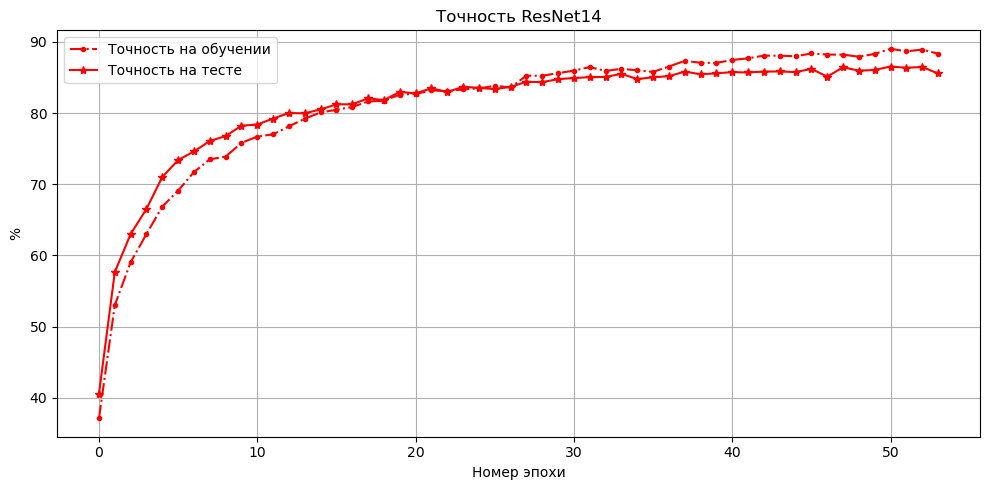

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(torch.tensor(train_accs14).cpu(), label="Точность на обучении", color='red', marker='.', linestyle='-.')
ax.plot(torch.tensor(test_accs14).cpu(), label="Точность на тесте", color='red', marker='*')

ax.set_xlabel("Номер эпохи")
ax.set_ylabel("$\%$")

ax.grid(True)
ax.legend()

ax.set_title("Точность ResNet14")

fig.tight_layout()
plt.show()

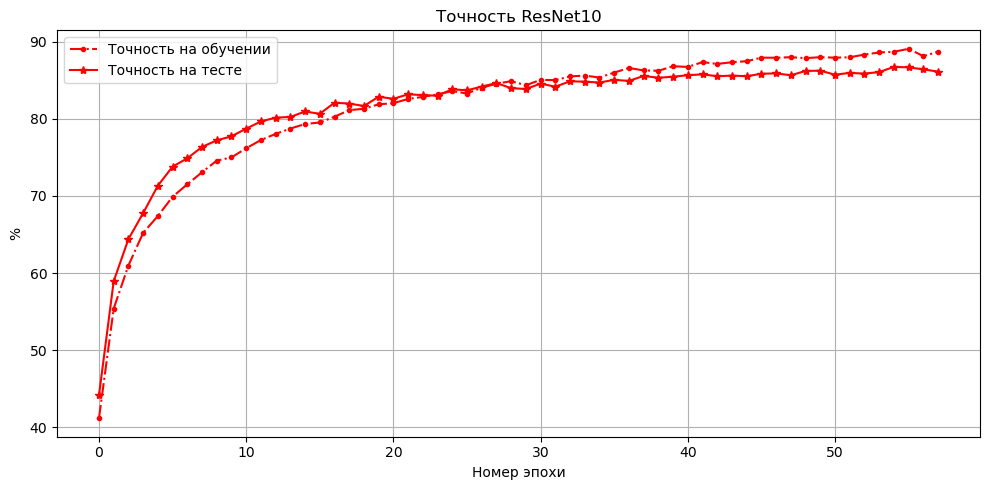

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(torch.tensor(train_accs10).cpu(), label="Точность на обучении", color='red', marker='.', linestyle='-.')
ax.plot(torch.tensor(test_accs10).cpu(), label="Точность на тесте", color='red', marker='*')

ax.set_xlabel("Номер эпохи")
ax.set_ylabel("$\%$")

ax.grid(True)
ax.legend()

ax.set_title("Точность ResNet10")

fig.tight_layout()
plt.show()

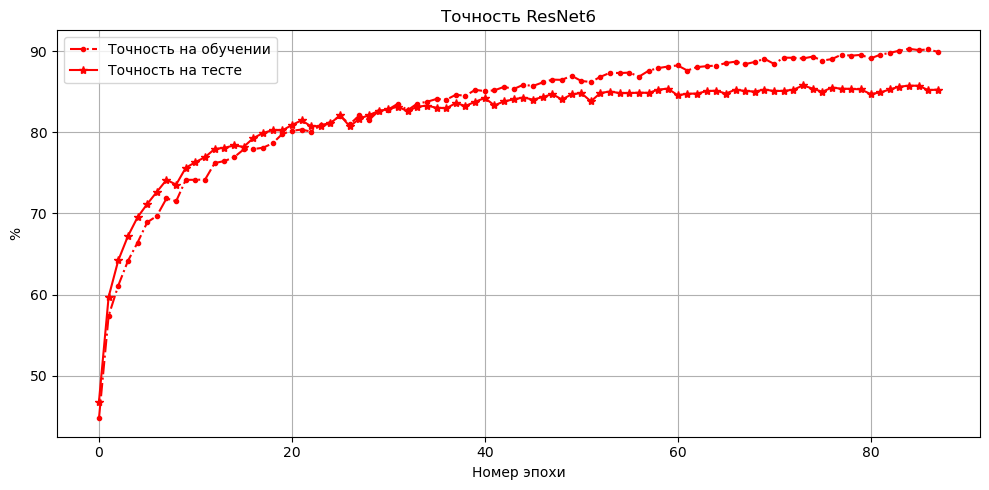

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(torch.tensor(train_accs6).cpu(), label="Точность на обучении", color='red', marker='.', linestyle='-.')
ax.plot(torch.tensor(test_accs6).cpu(), label="Точность на тесте", color='red', marker='*')

ax.set_xlabel("Номер эпохи")
ax.set_ylabel("$\%$")

ax.grid(True)
ax.legend()

ax.set_title("Точность ResNet6")

fig.tight_layout()
plt.show()

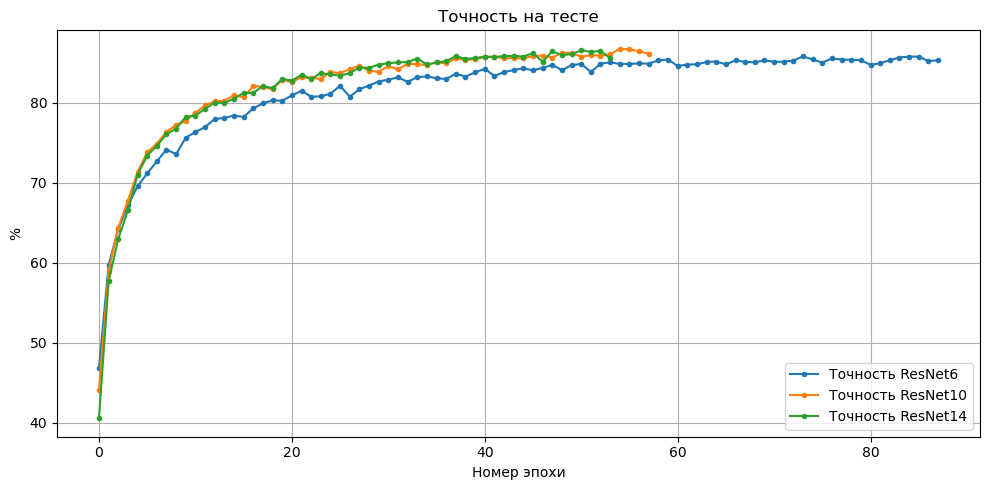

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(torch.tensor(test_accs6).cpu(), label="Точность ResNet6", marker='.')
ax.plot(torch.tensor(test_accs10).cpu(), label="Точность ResNet10", marker='.')
ax.plot(torch.tensor(test_accs14).cpu(), label="Точность ResNet14", marker='.')

ax.set_xlabel("Номер эпохи")
ax.set_ylabel("$\%$")

ax.grid(True)
ax.legend()

ax.set_title("Точность на тесте")

fig.tight_layout()
plt.show()